### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### Load and Prepare the Data

In [2]:
df = pd.read_csv("../data/raw_analyst_ratings/raw_analyst_ratings.csv")

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [5]:
df.info

<bound method DataFrame.info of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  

In [6]:
#find missing value
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [7]:
#find dupplicats
df.duplicated().sum()

0

## Descriptive Statistics:

In [8]:
df.columns
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)
# Descriptive statistics for headline lengths
headline_stats = df['headline_length'].describe()
# 2. Count the Number of Articles per Publisher
articles_per_publisher = df['publisher'].value_counts()
sorted_articles_per_publisher = sorted(articles_per_publisher.items(), key=lambda x: x[1], reverse=True)
# Display the results
print("Headline Length Statistics:\n", round(headline_stats,3))
# Display the results in table form
print("\nArticles per Publisher:\n", sorted_articles_per_publisher)

Headline Length Statistics:
 count    1407328.000
mean          73.121
std           40.735
min            3.000
25%           47.000
50%           64.000
75%           87.000
max          512.000
Name: headline_length, dtype: float64

Articles per Publisher:
 [('Paul Quintaro', 228373), ('Lisa Levin', 186979), ('Benzinga Newsdesk', 150484), ('Charles Gross', 96732), ('Monica Gerson', 82380), ('Eddie Staley', 57254), ('Hal Lindon', 49047), ('ETF Professor', 28489), ('Juan Lopez', 28438), ('Benzinga Staff', 28114), ('Vick Meyer', 24826), ('webmaster', 20313), ('Benzinga_Newsdesk', 19410), ('Zacks', 19390), ('Jayson Derrick', 19050), ('Allie Wickman', 18317), ('Shanthi Rexaline', 16640), ('Craig Jones', 16221), ('Wayne Duggan', 12897), ('Nelson Hem', 12590), ('Dwight Einhorn', 12226), ('Michael J. Zerinskas', 10892), ('Joe Young', 10777), ('Javier Hasse', 8839), ('David Johnson', 8749), ('Matthew Kennedy', 8167), ('Forex Live', 7198), ('Laura Brodbeck', 7069), ('Scott Rubin', 6553), ("Ja

Daily Count [(datetime.date(2020, 3, 12), 2739), (datetime.date(2020, 2, 28), 1620), (datetime.date(2020, 3, 19), 1595), (datetime.date(2020, 2, 27), 1567), (datetime.date(2020, 3, 6), 1428), (datetime.date(2020, 5, 7), 1398), (datetime.date(2020, 3, 23), 1391), (datetime.date(2020, 4, 29), 1389), (datetime.date(2020, 3, 11), 1384), (datetime.date(2020, 4, 30), 1327), (datetime.date(2019, 8, 1), 1270), (datetime.date(2020, 4, 15), 1253), (datetime.date(2018, 10, 30), 1228), (datetime.date(2020, 1, 22), 1198), (datetime.date(2020, 3, 16), 1181), (datetime.date(2019, 8, 7), 1180), (datetime.date(2018, 8, 2), 1175), (datetime.date(2020, 5, 6), 1175), (datetime.date(2020, 1, 21), 1171), (datetime.date(2020, 3, 9), 1170), (datetime.date(2018, 11, 1), 1168), (datetime.date(2019, 7, 31), 1161), (datetime.date(2018, 7, 26), 1146), (datetime.date(2019, 11, 7), 1144), (datetime.date(2020, 2, 20), 1139), (datetime.date(2020, 3, 10), 1134), (datetime.date(2009, 8, 10), 1130), (datetime.date(2020, 

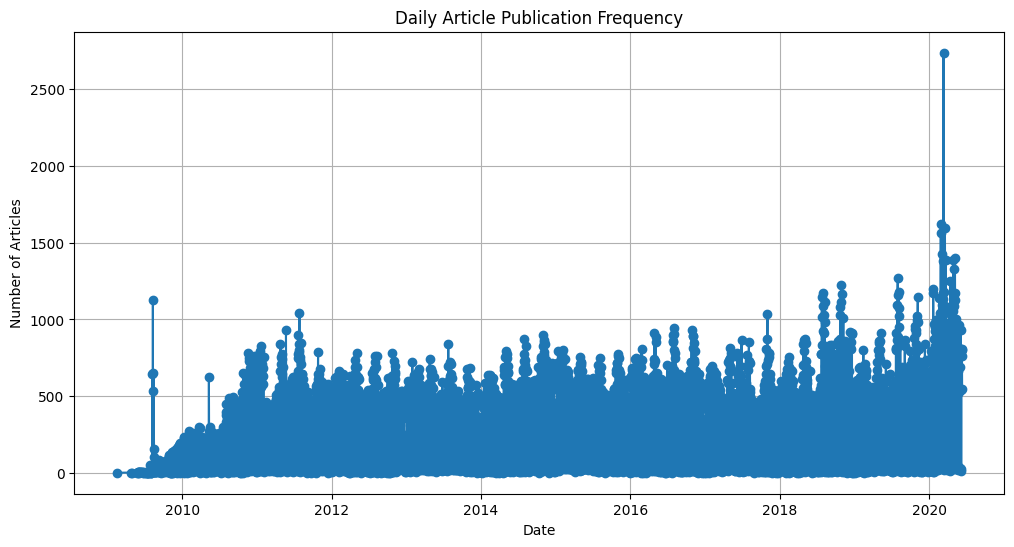

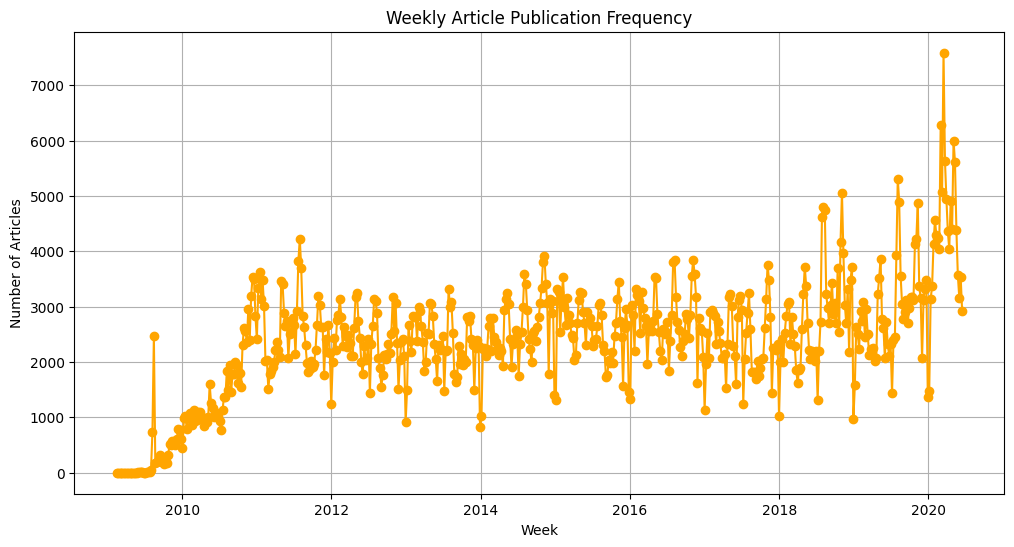

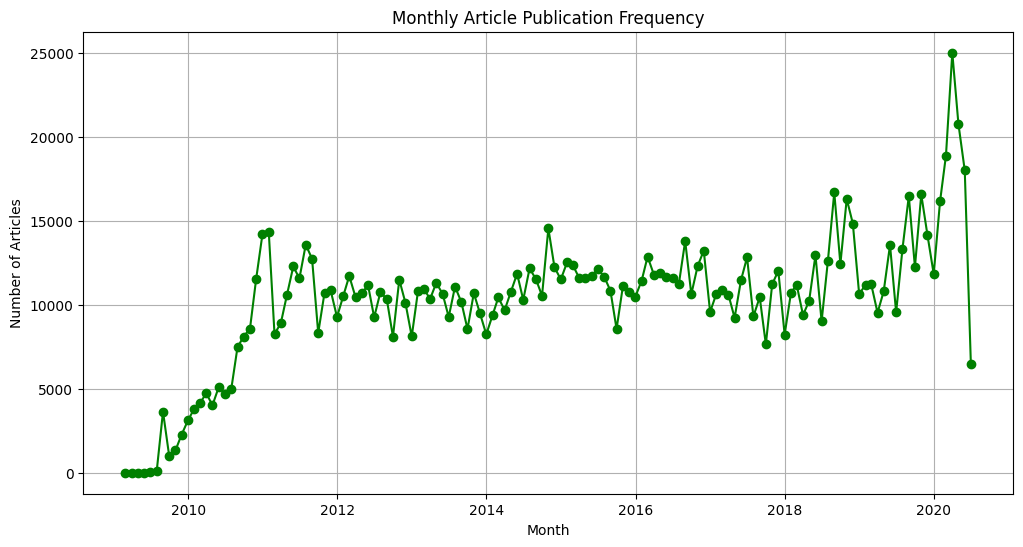

In [37]:
#Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='ISO8601', utc=True)

# 2. Extract relevant time information
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()


# 3. Group and aggregate data by date
daily_counts = df.groupby(df['date'].dt.date).size()
# print(daily_counts)
weekly_counts = df.groupby(pd.Grouper(key='date', freq='W')).size()
monthly_counts = df.groupby(pd.Grouper(key='date', freq='M')).size()
sorted_Daily_count = sorted(daily_counts.items(), key=lambda x: x[1], reverse=True)
print(f'Daily Count {sorted_Daily_count}')
# daily_count = [(item[0].strftime('%Y-%m-%d'), item[1]) for item in sorted_Daily_count]
sorted_Weekly_count = sorted(weekly_counts.items(), key=lambda x: x[1], reverse=True)
print(f'Weekly Count {sorted_Weekly_count}')
sorted_Monthly_count = sorted(monthly_counts.items(), key=lambda x: x[1], reverse=True)
print(f'Monthly Count {sorted_Monthly_count}')

# 4. Visualize the trends

# Plot daily counts
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Plot weekly counts
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', color='orange')
plt.title('Weekly Article Publication Frequency')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Plot monthly counts
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='green')
plt.title('Monthly Article Publication Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

### Text Analysis(Sentiment analysis & Topic Modeling):

In [38]:
df['date'] = df['date'].dt.date
# 1.1 Perform Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['headline'].apply(get_sentiment)


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

        date stock  headline_length  year  month  day day_of_week sentiment  
0 2020-06-05     A               39  2020      6    5      Fri

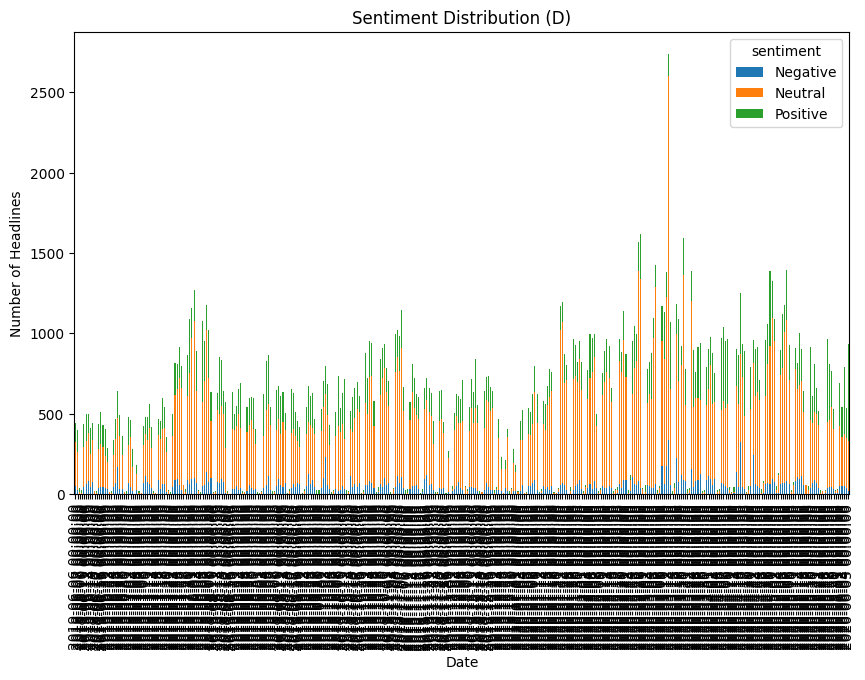

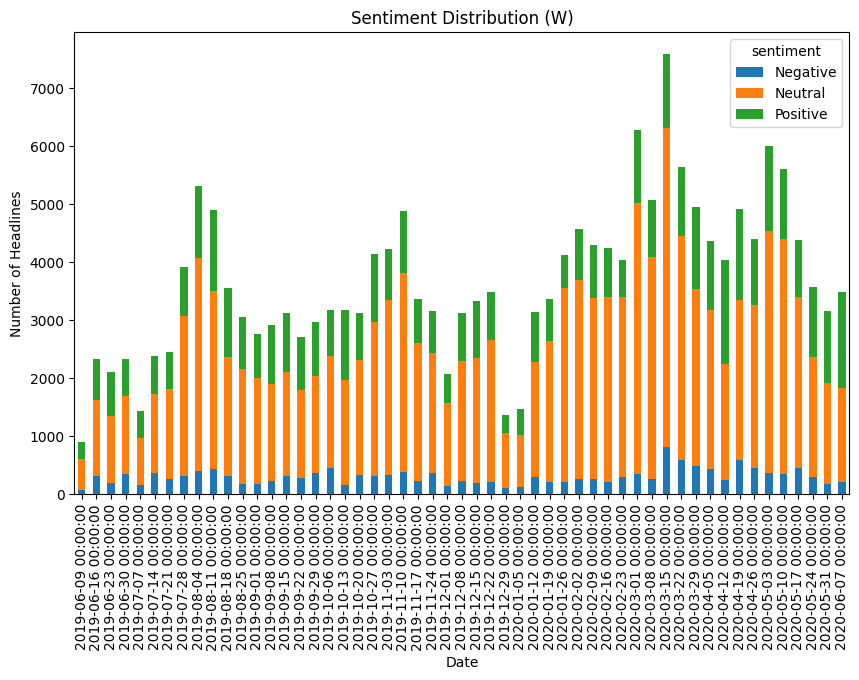

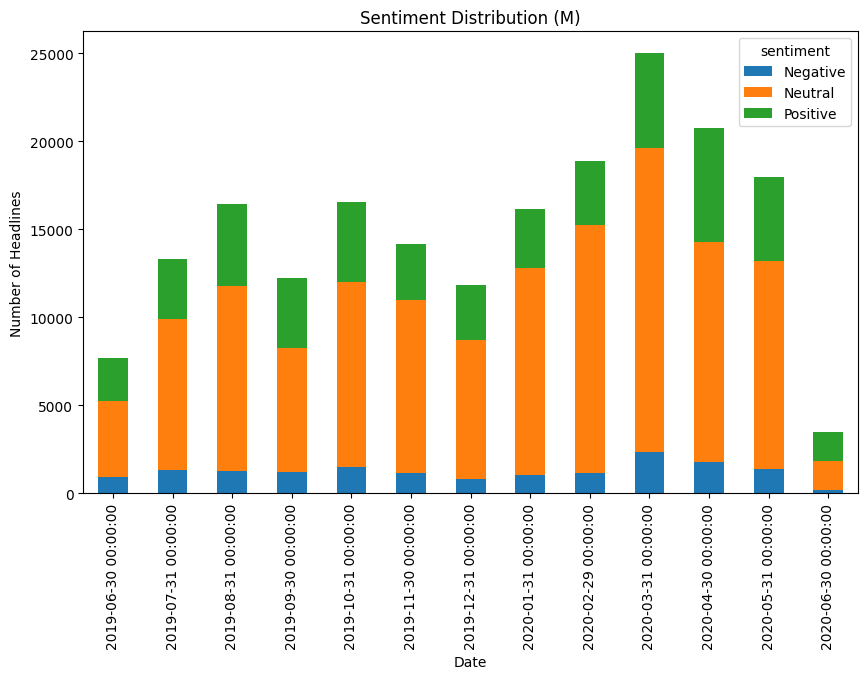

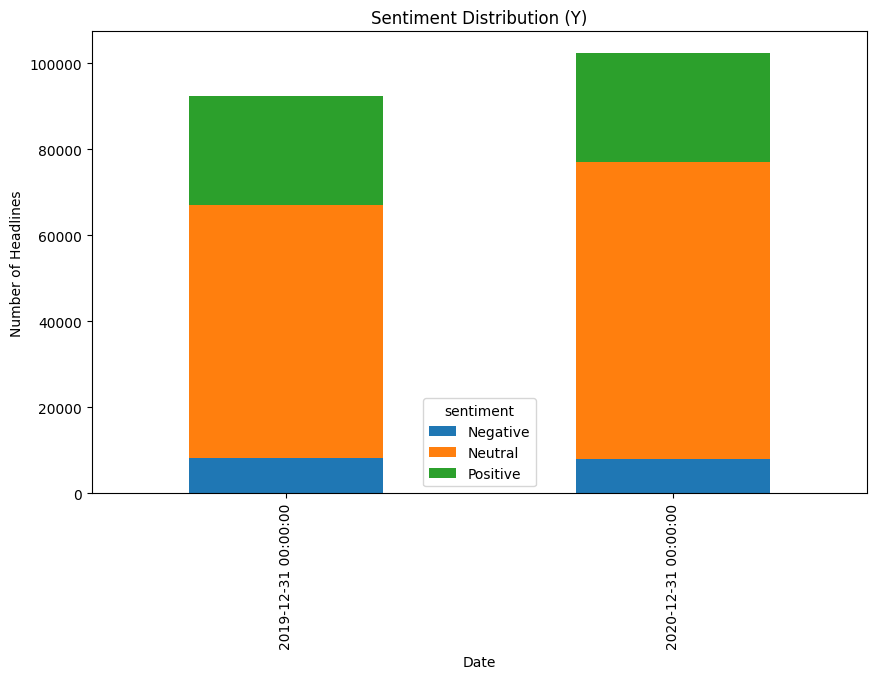

In [68]:
import matplotlib.dates as mdates
print(df.head())
df['date'] = pd.to_datetime(df['date'].dt.date)
start_date = pd.to_datetime('2019-06-06')
end_date = pd.to_datetime('2020-06-05')

# Filter the DataFrame based on the date range from 2019 to 2020
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, freq):
    # Resample data based on the specified frequency
    sentiment_counts = df.resample(freq, on='date')['sentiment'].value_counts().unstack().fillna(0)
    
    # Plot the sentiment distribution
    sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Sentiment Distribution ({freq})')
    plt.xlabel('Date')
    plt.ylabel('Number of Headlines')
    plt.show()

# Plot sentiment distribution for daily, weekly, monthly, and yearly data

plot_sentiment_distribution(filtered_df, 'D')  # Daily
plot_sentiment_distribution(filtered_df, 'W')  # Weekly
plot_sentiment_distribution(filtered_df, 'M')  # Monthly
plot_sentiment_distribution(filtered_df, 'Y')  # Yearly

In [24]:
# 1.2 Topic Modeling using LDA
# Vectorize the headlines
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['headline'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display the top words per topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, n_top_words)

# Display results
print(df[['date','headline', 'sentiment']])

Topic #1:
market update stocks announces mid session new moving day shares
Topic #2:
vs est eps reports sales pt raises maintains upgrades downgrades
Topic #3:
shares stocks earnings trading week benzinga stock 52 companies scheduled
                             date  \
0       2020-06-05 14:30:54+00:00   
1       2020-06-03 14:45:20+00:00   
2       2020-05-26 08:30:07+00:00   
3       2020-05-22 16:45:06+00:00   
4       2020-05-22 15:38:59+00:00   
...                           ...   
1407323 2011-08-29 00:00:00+00:00   
1407324 2011-06-22 00:00:00+00:00   
1407325 2011-06-21 00:00:00+00:00   
1407326 2011-06-21 00:00:00+00:00   
1407327 2011-05-12 00:00:00+00:00   

                                                  headline sentiment  
0                  Stocks That Hit 52-Week Highs On Friday   Neutral  
1               Stocks That Hit 52-Week Highs On Wednesday   Neutral  
2                            71 Biggest Movers From Friday   Neutral  
3             46 Stocks Moving In Fri

### Time Series Analysis

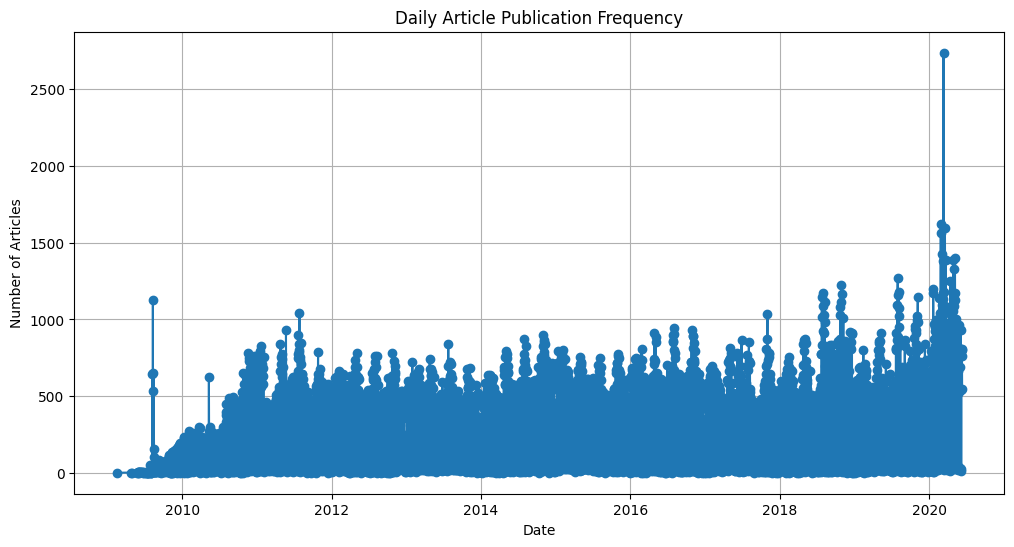

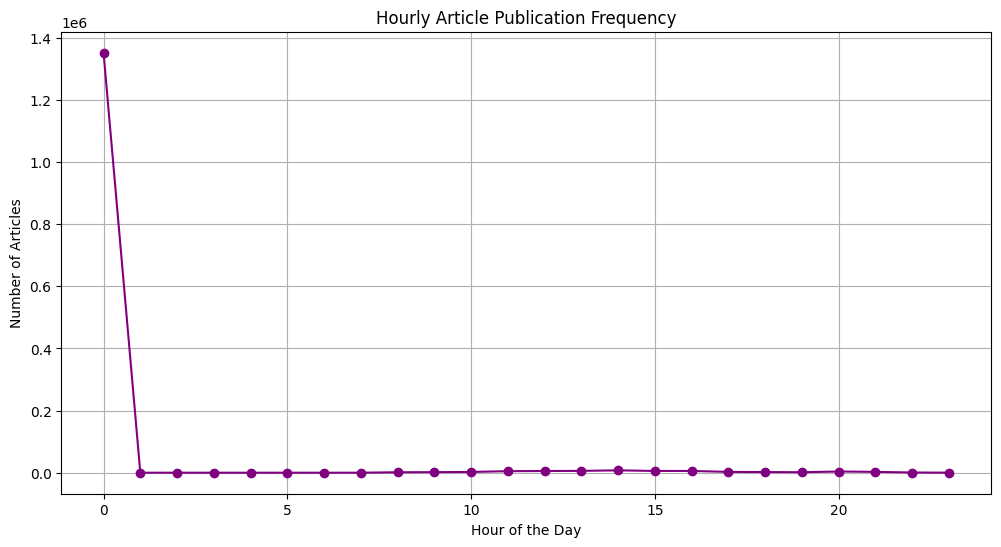

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Convert the 'date' column to datetime if not already done
df['date'] = pd.to_datetime(df['date'],format="ISO8601", utc=True)

# 2.1 Analyze Publication Frequency Over Time
daily_counts = df.groupby(df['date'].dt.date).size()

# Plot daily counts
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# 2.2 Analyze Publishing Times (Hour of the Day)
df['hour'] = df['date'].dt.hour
hourly_counts = df.groupby(df['hour']).size()

# Plot hourly counts
plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='purple')
plt.title('Hourly Article Publication Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


### 	Publisher Analysis

In [ ]:
# 3.1 Count the Number of Articles per Publisher
articles_per_publisher = df['publisher'].value_counts()

# Display the top publishers
print("Top Publishers:\n", articles_per_publisher)

# 3.2 Extract Unique Domains (if emails are used as publisher names)
# Assuming 'publisher' column contains email addresses
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)
domains_count = df['domain'].value_counts()

# Display the top domains
print("\nTop Domains:\n", domains_count)


Top Publishers:
 publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

Top Domains:
 domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Mark Davis                1
janaviktoria              1
Kiana Danial              1
giovannimola              1
Jeremie Capron            1
Name: count, Length: 1024, dtype: int64
